## Importing Liabraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [84]:
data = pd.read_csv("pima-indians-diabetes.csv",header=None)

In [85]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies = Number of times pregnant
Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure = Diastolic blood pressure (mm Hg)
SkinThickness = Triceps skin fold thickness (mm)
Insulin = 2-Hour serum insulin (mu U/ml)
BMI = Body mass index (weight in kg/(height in m)^2)
DiabetesPedigree = FunctionDiabetes pedigree function
Age = Age (years)
Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [86]:
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigree","Age","Outcome"]

In [87]:
data.columns = columns

In [88]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Pre-Processing

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
data = data.drop_duplicates()

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


# splitting data

In [93]:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

In [94]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state=0)

In [95]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(537, 8)
(537,)
(231, 8)
(231,)


## Scaling Data

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [71]:
pd.DataFrame(xtrain).describe()

,0,1,2,3,4,5,6,7
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-1.984756e-17,2.017836e-16,-2.447866e-16,4.796494e-17,9.923781e-18,2.447866e-16,-1.653964e-17,9.923781e-17
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.133115e+00,-3.773201e+00,-3.582443e+00,-1.313197e+00,-7.165234e-01,-4.018322e+00,-1.159301e+00,-1.056545e+00
25%,-8.391623e-01,-6.998478e-01,-2.913949e-01,-1.313197e+00,-7.165234e-01,-5.923898e-01,-6.923722e-01,-8.063841e-01
50%,-2.512560e-01,-1.100124e-01,1.199861e-01,1.853405e-01,-3.367465e-01,1.804892e-02,-2.793200e-01,-3.894495e-01
75%,6.306034e-01,6.350428e-01,5.313672e-01,7.472921e-01,4.228072e-01,5.661980e-01,4.240661e-01,6.111935e-01
max,3.864088e+00,2.373505e+00,2.691118e+00,4.868270e+00,6.423282e+00,4.340952e+00,5.832656e+00,3.946670e+00


In [72]:
pd.DataFrame(xtest).describe()

,0,1,2,3,4,5,6,7
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,2.310000e+02,2.310000e+02,2.310000e+02
mean,4.229421e-17,-9.996813e-17,-3.498885e-16,3.075943e-17,0.000000,-7.742724e-16,1.384174e-16,2.306957e-17
std,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172,1.002172e+00,1.002172e+00,1.002172e+00
min,-1.163404e+00,-3.815978e+00,-3.561600e+00,-1.234043e+00,-0.640299,-4.190851e+00,-1.219420e+00,-1.011784e+00
25%,-8.590481e-01,-6.515860e-01,-3.572516e-01,-1.234043e+00,-0.640299,-6.453089e-01,-7.010024e-01,-8.317904e-01
50%,-2.503361e-01,-2.040963e-01,1.155212e-01,1.027910e-01,-0.640299,-2.433819e-02,-3.245322e-01,-3.818054e-01
75%,6.627319e-01,5.630290e-01,5.357637e-01,8.030375e-01,0.353992,5.899554e-01,5.225257e-01,6.081615e-01
max,2.793224e+00,2.544769e+00,2.426855e+00,2.203530e+00,5.768400,2.873525e+00,4.381345e+00,2.948083e+00


# <font color = "red">Random Forest

#### Traning Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 150 , criterion= "entropy", random_state=0)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

#### predicting xtest

In [108]:
rfc_pred = rfc.predict(xtest)
rfc_pred

C:\Users\karma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Result

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

rfc_cm = confusion_matrix(ytest,rfc_pred)
print(rfc_cm)
print(accuracy_score(ytest,rfc_pred))

[[139  18]
 [ 29  45]]
0.7965367965367965


<AxesSubplot:>

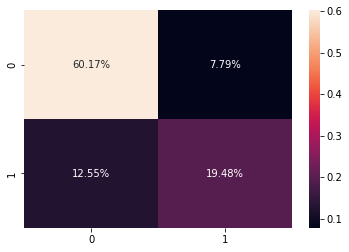

In [22]:
import seaborn as sns
sns.heatmap(rfc_cm/np.sum(rfc_cm), annot=True, 
            fmt='.2%')

#### KFold

In [23]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)

In [24]:
rfc_crossval = cross_val_score(rfc, x, y,cv=kf)
rfc_crossval

array([0.75974026, 0.69480519, 0.79220779, 0.83660131, 0.78431373])

In [25]:
rfc_crossval.mean()

0.7735336558865971

#### <font color = "red">Bagging on Random Forest

In [26]:
from sklearn.ensemble import BaggingClassifier

bag_rfc = BaggingClassifier(base_estimator=rfc, n_estimators=150, max_samples=0.7, random_state=0)
bag_rfc = bag_rfc.fit(xtrain,ytrain)

#### Bagged Random Forest Prediction

In [27]:
#prediction
bag_rfc_pred = bag_rfc.predict(xtest)
bag_rfc_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

#### Bagged Random Forest ConfusionMatrix

In [28]:
bag_rfc_cm = confusion_matrix(ytest,bag_rfc_pred)
print(bag_rfc_cm)
print(accuracy_score(ytest,bag_rfc_pred))

[[139  18]
 [ 33  41]]
0.7792207792207793


<AxesSubplot:>

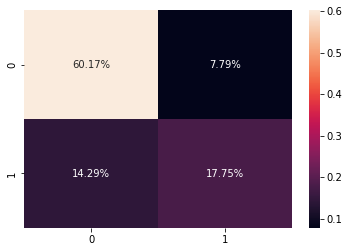

In [29]:
import seaborn as sns
sns.heatmap(bag_rfc_cm/np.sum(bag_rfc_cm), annot=True, 
            fmt='.2%')

#### Bagged Random Forest Kfold Validation

In [30]:
# K-fold
bag_rfc_crossval = cross_val_score(bag_rfc, x, y, cv=kf)
bag_rfc_crossval

array([0.75324675, 0.70779221, 0.79220779, 0.85620915, 0.77124183])

In [31]:
bag_rfc_crossval.mean()

0.7761395467277821

<font color = 'blue'>we achieved 77.62 % acuracy

# Exporting Model

In [83]:
import pickle

In [84]:
#exporting on disk
pickle.dump(bag_rfc, open('diabetes_rfc.pkl','wb'))

In [85]:
# Loading model to compare the results
model = pickle.load(open('diabetes_rfc.pkl','rb'))
print(model.predict([[6,148,72,35,0,33.6,0.627,50]]))

[1]


In [91]:
a = [13,145,82,19,110,22.2,0.245,57]
print(model.predict([a]))

[1]
